In [1]:
import re
import string
!pip install visualkeras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn plotly 
import seaborn as sns

import tensorflow as tf
!pip install transformers

import transformers
from transformers import BertTokenizer
from transformers import TFAutoModel

from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)
print(transformers.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 13.6 MB/s eta 0:00:00


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2.11.0
4.28.1


# 📋 Loading the Data

In [2]:
import pandas as pd
import numpy as np
!pip install gensim nltk
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings("ignore")
#df = pd.read_csv('/kaggle/input/uk-twitter-covid19-dataset/sample_data.csv')
#df = pd.read_csv('/kaggle/input/external-covid-19-twitter-dataset/us_airlines_sample_data.csv')
#df = pd.read_csv('/kaggle/input/appletwittersentimenttexts/apple-twitter-sentiment-texts.csv')
df = pd.read_csv('/kaggle/input/extended-covid-twitter-datasets/sample_data_global.csv')
#df = pd.read_csv('/kaggle/input/external-covid-19-twitter-dataset/Twitter_Data.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409395 entries, 0 to 409394
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   created_at                409395 non-null  object 
 1   near                      409395 non-null  object 
 2   clean_tweet               409395 non-null  object 
 3   tokens                    409395 non-null  object 
 4   lemma                     409395 non-null  object 
 5   lemma_sentence            409395 non-null  object 
 6   pos_tag                   409395 non-null  object 
 7   lemma_sentence(with POS)  409395 non-null  object 
 8   sentiword_analysis        409395 non-null  float64
 9   vader_score               409395 non-null  float64
 10  textblob_polarity         409395 non-null  float64
 11  senti_textblob            409395 non-null  int64  
 12  senti_wordnet             409395 non-null  int64  
 13  senti_vader               409395 non-null  i

In [4]:
df = df.dropna()
df.head()

,created_at,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS),sentiword_analysis,vader_score,textblob_polarity,senti_textblob,senti_wordnet,senti_vader
0,2020-08-20,India,fan request arang bed posit father view tweet,"['fan', 'request', 'arang', 'bed', 'posit', 'f...","['fan', 'request', 'arang', 'bed', 'posit', 'f...",fan request arang bed posit father view tweet,"[('fan', 'n'), ('request', 'n'), ('arang', 'n'...",fan request arang bed posit father view tweet,0.000,0.3182,0.000000,0,0,1
1,2020-08-20,India,today launch woman aid annual impact report sp...,"['today', 'launch', 'woman', 'aid', 'annual', ...","['today', 'launch', 'woman', 'aid', 'annual', ...",today launch woman aid annual impact report sp...,"[('today', 'n'), ('launch', 'v'), ('woman', 'n...",today launch woman aid annual impact report ...,0.125,0.4019,0.357143,1,1,1
2,2020-08-20,India,kebi cso cbo risk comun comun engag covid prim...,"['kebi', 'cso', 'cbo', 'risk', 'comun', 'comun...","['kebi', 'cso', 'cbo', 'risk', 'comun', 'comun...",kebi cso cbo risk comun comun engag covid prim...,"[('kebi', 'n'), ('cso', 'n'), ('cbo', 'n'), ('...",kebi cso cbo risk comun comun engag covid pr...,0.375,0.2732,0.033333,1,1,1
3,2020-08-20,India,etonian english imperi heart deadli covid cris...,"['etonian', 'english', 'imperi', 'heart', 'dea...","['etonian', 'english', 'imperi', 'heart', 'dea...",etonian english imperi heart deadli covid cris...,"[('etonian', 'a'), ('english', 'a'), ('imperi'...",etonian english imperi heart deadli covid cr...,-0.125,0.6369,0.000000,0,-1,1
4,2020-08-20,India,unlock read scott morrison team master spin ma...,"['unlock', 'read', 'scott', 'morrison', 'team'...","['unlock', 'read', 'scott', 'morrison', 'team'...",unlock read scott morrison team master spin ma...,"[('unlock', 'n'), ('read', 'v'), ('scott', 'n'...",unlock read scott morrison team master spin ...,0.625,0.3818,0.000000,0,1,1


In [5]:
df['text'] = df['clean_tweet']
df['target'] = df['senti_textblob']
#df['text'] = df['clean_text']
#df['target'] = df['category']

In [6]:
import pandas as pd

# assuming your dataframe is named 'df'
num_samples_per_label = 5000

# group the dataframe by the label column
grouped_df = df.groupby('target')

# sample a specified number of rows from each group
sampled_df = grouped_df.apply(lambda x: x.sample(n=num_samples_per_label))

# reset the index of the resulting dataframe
sampled_df = sampled_df.reset_index(drop=True)
df = sampled_df 


In [7]:
#df = df.drop(columns = ['clean_text','category'])
df

,created_at,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS),sentiword_analysis,vader_score,textblob_polarity,senti_textblob,senti_wordnet,senti_vader,text,target
0,2020-09-30,United States,case rest assur yank american secret servic inv,"['case', 'rest', 'assur', 'yank', 'american', ...","['case', 'rest', 'assur', 'yank', 'american', ...",case rest assur yank american secret servic inv,"[('case', 'n'), ('rest', 'n'), ('assur', 'n'),...",case rest assur yank american secret servic inv,-0.250,0.0000,-0.200000,-1,-1,0,case rest assur yank american secret servic inv,-1
1,2020-04-29,United Kingdom,rahul sharma age year resid ganesh nagar panda...,"['rahul', 'sharma', 'age', 'year', 'resid', 'g...","['rahul', 'sharma', 'age', 'year', 'resid', 'g...",rahul sharma age year resid ganesh nagar panda...,"[('rahul', 'n'), ('sharma', 'n'), ('age', 'n')...",rahul sharma age year resid ganesh nagar pan...,0.125,0.0000,-0.300000,-1,1,0,rahul sharma age year resid ganesh nagar panda...,-1
2,2020-07-10,United Kingdom,lana del rey anger fan wore face mask surpris ...,"['lana', 'del', 'rey', 'anger', 'fan', 'wore',...","['lana', 'del', 'rey', 'anger', 'fan', 'wore',...",lana del rey anger fan wore face mask surpris ...,"[('lana', 'a'), ('del', 'n'), ('rey', 'n'), ('...",lana del rey anger fan wear face mask surpri...,0.250,-0.3400,-0.700000,-1,1,-1,lana del rey anger fan wore face mask surpris ...,-1
3,2021-12-06,United States,iron time patient sick admit hospit covid tend...,"['iron', 'time', 'patient', 'sick', 'admit', '...","['iron', 'time', 'patient', 'sick', 'admit', '...",iron time patient sick admit hospit covid tend...,"[('iron', 'n'), ('time', 'n'), ('patient', 'a'...",iron time patient sick admit hospit covid te...,0.000,-0.3612,-0.714286,-1,0,-1,iron time patient sick admit hospit covid tend...,-1
4,2021-06-27,United States,put malta green list british tourist travel decid,"['put', 'malta', 'green', 'list', 'british', '...","['put', 'malta', 'green', 'list', 'british', '...",put malta green list british tourist travel decid,"[('put', 'n'), ('malta', 'n'), ('green', 'a'),...",put malta green list british tourist travel ...,-0.375,0.0000,-0.100000,-1,-1,0,put malta green list british tourist travel decid,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2021-11-06,United States,sri lanka record highest singl day covid death...,"['sri', 'lanka', 'record', 'highest', 'singl',...","['sri', 'lanka', 'record', 'highest', 'singl',...",sri lanka record highest singl day covid death...,"[('sri', 'n'), ('lanka', 'n'), ('record', 'n')...",sri lanka record high singl day covid death ...,-0.125,-0.5994,0.160000,1,-1,-1,sri lanka record highest singl day covid death...,1
14996,2021-05-30,United States,follow pleas kind patient week melbourn normal,"['follow', 'pleas', 'kind', 'patient', 'week',...","['follow', 'plea', 'kind', 'patient', 'week', ...",follow plea kind patient week melbourn normal,"[('follow', 'a'), ('pleas', 'n'), ('kind', 'n'...",follow plea kind patient week melbourn normal,-0.375,0.5267,0.375000,1,-1,1,follow pleas kind patient week melbourn normal,1
14997,2021-05-25,United States,unifir proud partner clear mobil covid test ef...,"['unifir', 'proud', 'partner', 'clear', 'mobil...","['unifir', 'proud', 'partner', 'clear', 'mobil...",unifir proud partner clear mobil covid test ef...,"[('unifir', 'a'), ('proud', 'a'), ('partner', ...",unifir proud partner clear mobil covid test ...,0.750,0.6908,0.450000,1,1,1,unifir proud partner clear mobil covid test ef...,1
14998,2021-03-06,United States,govern risk assess delta variant evid frequent...,"['govern', 'risk', 'assess', 'delta', 'variant...","['govern', 'risk', 'ass', 'delta', 'variant', ...",govern risk ass delta variant evid frequent va...,"[('govern', 'a'), ('risk', 'n'), ('assess', 'n...",govern risk ass delta variant evid frequent ...,-0.250,-0.6808,0.100000,1,-1,-1,govern risk assess delta variant evid frequent...,1


In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df[['text','target']], test_size = 0.2, random_state = 42)

In [9]:
train

,text,target
9839,mask mandat pandem continu protect,0
9680,intel comun covid spread natur,0
7093,compar covid death flu death compar apl orang ...,0
11293,quick updat covid global,1
820,aplic complet ime aplic complet ime past,-1
...,...,...
5191,part initi gov mike dewin anounc date variou b...,0
13418,truli love hear someon differ opinion perfectl...,1
5390,implic covid peac secur africa,0
860,real danger covid vacin base coronaviru vacin ...,-1


In [10]:
print("train, counts of label '1': {}".format(sum(train.target == 1)))
print("train, counts of label '0': {}".format(sum(train.target == 0)))
print("train, counts of label '-1': {}\n".format(sum(train.target == -1)))
print("test, counts of label '1': {}".format(sum(test.target == 1)))
print("test, counts of label '0': {}".format(sum(test.target == 0)))
print("test, counts of label '-1': {}".format(sum(test.target == -1)))

train, counts of label '1': 4007
train, counts of label '0': 4030
train, counts of label '-1': 3963

test, counts of label '1': 993
test, counts of label '0': 970
test, counts of label '-1': 1037


In [11]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

#train = reduce_mem_usage(train)
#train = reduce_mem_usage(test)

In [12]:
'''
import pandas as pd

# assume your test data is stored in a pandas DataFrame called 'test'
# and the labels are stored in a column called 'target'

# randomly sample 1000 rows from each label
label_1 = test[test.target == 1].sample(n=1000, replace=False)
label_0 = test[test.target == 0].sample(n=1000, replace=False)
label_minus_1 = test[test.target == -1].sample(n=1000, replace=False)

# concatenate the sampled rows into one DataFrame
sampled_data = pd.concat([label_1, label_0, label_minus_1])

# shuffle the DataFrame
test = sampled_data.sample(frac=1).reset_index(drop=True)
'''

"\nimport pandas as pd\n\n# assume your test data is stored in a pandas DataFrame called 'test'\n# and the labels are stored in a column called 'target'\n\n# randomly sample 1000 rows from each label\nlabel_1 = test[test.target == 1].sample(n=1000, replace=False)\nlabel_0 = test[test.target == 0].sample(n=1000, replace=False)\nlabel_minus_1 = test[test.target == -1].sample(n=1000, replace=False)\n\n# concatenate the sampled rows into one DataFrame\nsampled_data = pd.concat([label_1, label_0, label_minus_1])\n\n# shuffle the DataFrame\ntest = sampled_data.sample(frac=1).reset_index(drop=True)\n"

In [13]:
test

,text,target
11499,death covid major indic today,1
6475,manitoba medium bulletin covid bulletin,0
13167,trump ofici tri fast track fund friend unprove...,1
862,leadership crisi mani level mani countri plan ...,-1
5970,westward everi credit nigel bowden,0
...,...,...
6216,covid onlin retail scheme open aplic monday au...,0
3585,polic arrest laboratori attend alegedli fake c...,-1
10023,watch live join transport secretari shadow for...,1
14044,twitter suspend account youtub remov video bio...,1


In [14]:
#train2, test2 = train, test

# 🔨 Preprocessing

In [15]:
#Use regex to clean the data
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text 

def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0)     
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

train['text'] = train['text'].apply(lambda x : remove_url(x))
train['text'] = train['text'].apply(lambda x : remove_punct(x))
train['text'] = train['text'].apply(lambda x : remove_emoji(x))
train['text'] = train['text'].apply(lambda x : decontraction(x))
train['text'] = train['text'].apply(lambda x : seperate_alphanumeric(x))
train['text'] = train['text'].apply(lambda x : unique_char(cont_rep_char,x))

test['text'] = test['text'].apply(lambda x : remove_url(x))
test['text'] = test['text'].apply(lambda x : remove_punct(x))
test['text'] = test['text'].apply(lambda x : remove_emoji(x))
test['text'] = test['text'].apply(lambda x : decontraction(x))
test['text'] = test['text'].apply(lambda x : seperate_alphanumeric(x))
test['text'] = test['text'].apply(lambda x : unique_char(cont_rep_char,x))

# ✂️ Tokenization

In [16]:
seq_len = 256 #max([len(text) for text in train['text']]) #256
batch_size = 16 #16
num_samples = len(train)

model_name = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)

train_tokens = tokenizer(
    train['text'].tolist(), 
    max_length=seq_len, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True, 
    return_tensors='np'
)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['target'] = le.fit_transform(train['target'])
test['target'] = le.fit_transform(test['target'])

y_train = train['target'].values
labels = np.zeros((num_samples, y_train.max() + 1))
labels[np.arange(num_samples), y_train] = 1

dataset = tf.data.Dataset.from_tensor_slices(
    (
        train_tokens['input_ids'], 
        train_tokens['attention_mask'], 
        labels
    )
)

def map_func(input_ids, masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': masks
    }, labels

dataset = dataset.map(map_func)
dataset = dataset.shuffle(10000).batch(batch_size=batch_size, drop_remainder=True)

split = 0.7
size = int((train_tokens['input_ids'].shape[0] // batch_size) * split)

train_ds = dataset.take(size)
val_ds = dataset.skip(size)

In [17]:
size

525

In [18]:
labels.shape

(12000, 3)

# 🤖 Model Building

## 1 Hidden Layer

In [19]:
#'''
tf.keras.backend.clear_session()
###### MODEL 1 ####

# detect and init the TPU
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
# instantiate a distribution strategy
#tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# instantiating the model in the strategy scope creates the model on the TPU
#with tpu_strategy.scope():
model = TFAutoModel.from_pretrained(model_name)

# Two inputs
input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')

# Transformer
# embeddings = model.bert(input_ids, attention_mask=mask)[1]
embeddings = model(input_ids, attention_mask=mask)[0]
embeddings = embeddings[:, 0, :]
#embeddings = tf.keras.layers.GlobalAveragePooling1D()(embeddings)

# Classifier head
x = tf.keras.layers.Dense(512, activation='relu')(embeddings)
#x = tf.keras.layers.Dropout(0.1)(x)
y = tf.keras.layers.Dense(3, activation='softmax', name='outputs')(x)

bert_model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

# freeze bert layers
# bert_model.layers[2].trainable = False

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy()

bert_model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Fit the model with early stopping
history = bert_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    batch_size=batch_size,
    callbacks=[early_stop]
)

#'''

All model checkpoint layers were used when initializing TFRobertaModel.

All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/50
525/525 [==============================] - 529s 937ms/step - loss: 0.5315 - categorical_accuracy: 0.7911 - val_loss: 0.1986 - val_categorical_accuracy: 0.9403
Epoch 2/50
525/525 [==============================] - 490s 933ms/step - loss: 0.1782 - categorical_accuracy: 0.9464 - val_loss: 0.0980 - val_categorical_accuracy: 0.9706
Epoch 3/50
525/525 [==============================] - 490s 933ms/step - loss: 0.0969 - categorical_accuracy: 0.9723 - val_loss: 0.0488 - val_categorical_accuracy: 0.9867
Epoch 4/50
525/525 [==============================] - 490s 934ms/step - loss: 0.0626 - categorical_accuracy: 0.9814 - val_loss: 0.0263 - val_categorical_accuracy: 0.9933
Epoch 5/50
525/525 [==============================] - 491s 934ms/step - loss: 0.0410 - categorical_accuracy: 0.9888 - val_loss: 0.0193 - val_categorical_accuracy: 0.9939
Epoch 6/50
525/525 [==============================] - 489s 931ms/step - loss: 0.0416 - categorical_accuracy: 0.9888 - val_loss: 0.0238 - val_categoric

              precision    recall  f1-score   support

    Negative       0.96      0.97      0.97      1037
     Neutral       0.98      0.96      0.97       970
    Positive       0.97      0.98      0.97       993

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



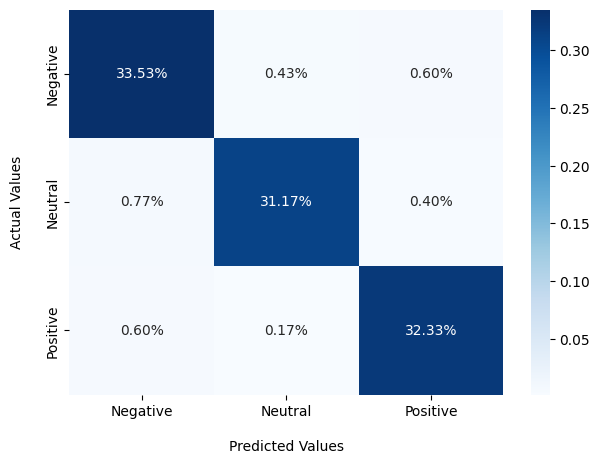

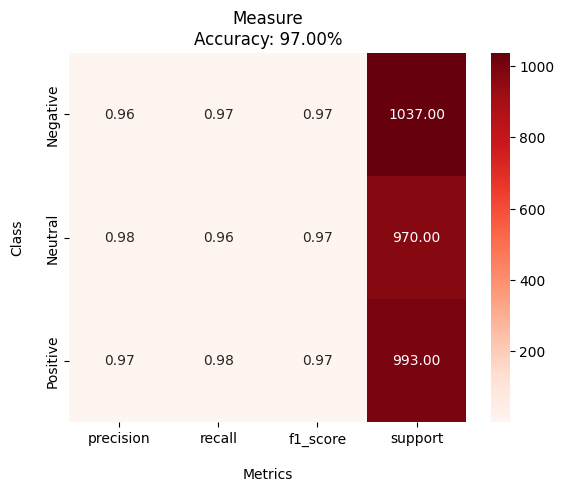

In [20]:
# For Data Visualization
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random
from IPython import display

def prep_data(text):
    tokens = tokenizer(
        text, max_length=seq_len, truncation=True, 
        padding='max_length', 
        add_special_tokens=True, 
        return_tensors='tf'
    )
    return {
        'input_ids': tokens['input_ids'], 
        'attention_mask': tokens['attention_mask']
    }

test['prediction'] = None

for i, row in test.iterrows():
    tokens = prep_data(row['text'])
    #probs = bert_model.predict(tokens)
    probs = bert_model.predict_on_batch(tokens)
    pred = np.argmax(probs)
    test.at[i, 'prediction'] = pred
    
test['prediction'] = test['prediction'].astype(int)

labels = ['Negative','Neutral','Positive']
from sklearn.metrics import classification_report
print(classification_report(test['target'], test['prediction'], target_names=labels))


from sklearn.metrics import *
cm = confusion_matrix(test['target'], test['prediction'])

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values\n');

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.savefig('cm.png')
plt.show()

print()
print()
print()

from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


def plot_classification_report(report):
    report_data = []
    lines = report.split('\n')
    lines = list(filter(None, lines))
    for line in lines[1:-3]:
        row = {}
        row_data = line.split()
        row_data = list(filter(None, row_data))
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    df = pd.DataFrame.from_dict(report_data)
    df.set_index('class', inplace=True)
    heatmap = sns.heatmap(df, annot=True, cmap='Reds', fmt='.2f')
    heatmap.set_xlabel('\nMetrics')
    heatmap.set_ylabel('Class\n')
    heatmap.set_title('Classification Report')


def accuracy_score(report):
    report_data = []
    lines = report.split('\n')
    lines = list(filter(None, lines))
    for line in lines[4:-2]:
        row_data = line.split()
        row_data = list(filter(None, row_data))
        return float(row_data[1])


labels = ['Negative','Neutral','Positive']

report = classification_report(test['target'], test['prediction'], target_names=labels)
plot_classification_report(report)
accuracy = accuracy_score(report)

plt.title('Measure\nAccuracy: {:.2f}%'.format(accuracy*100))
plt.savefig('classification_reports.png')
plt.show()


## 3 Hidden Layers

In [21]:
#'''
tf.keras.backend.clear_session()
### MODEL 2 ####
# detect and init the TPU
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
# instantiate a distribution strategy
#tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# instantiating the model in the strategy scope creates the model on the TPU
#with tpu_strategy.scope():

model = TFAutoModel.from_pretrained(model_name)

# Two inputs
input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')

# Transformer
embeddings = model(input_ids, attention_mask=mask)[0]
embeddings = tf.keras.layers.GlobalAveragePooling1D()(embeddings)
#embeddings = embeddings[:, 0, :]

# Classifier head
x = tf.keras.layers.Dense(512, activation='relu')(embeddings)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)
y = tf.keras.layers.Dense(3, activation='softmax', name='outputs')(x)


bert_model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

optimizer = tf.keras.optimizers.Adam(learning_rate= 4e-5)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy()

bert_model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Fit the model with early stopping
history = bert_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    batch_size=batch_size,
    callbacks=[early_stop]
)

#'''

All model checkpoint layers were used when initializing TFRobertaModel.

All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/50
525/525 [==============================] - 555s 989ms/step - loss: 0.6483 - categorical_accuracy: 0.7102 - val_loss: 0.2175 - val_categorical_accuracy: 0.9383
Epoch 2/50
525/525 [==============================] - 515s 981ms/step - loss: 0.2037 - categorical_accuracy: 0.9394 - val_loss: 0.1417 - val_categorical_accuracy: 0.9622
Epoch 3/50
525/525 [==============================] - 516s 982ms/step - loss: 0.1297 - categorical_accuracy: 0.9660 - val_loss: 0.0808 - val_categorical_accuracy: 0.9814
Epoch 4/50
525/525 [==============================] - 516s 982ms/step - loss: 0.1092 - categorical_accuracy: 0.9705 - val_loss: 0.0924 - val_categorical_accuracy: 0.9767
Epoch 5/50
525/525 [==============================] - 516s 983ms/step - loss: 0.0773 - categorical_accuracy: 0.9788 - val_loss: 0.0430 - val_categorical_accuracy: 0.9883
Epoch 6/50
525/525 [==============================] - 537s 1s/step - loss: 0.0598 - categorical_accuracy: 0.9829 - val_loss: 0.0360 - val_categorical_

              precision    recall  f1-score   support

    Negative       0.96      0.96      0.96      1037
     Neutral       0.98      0.96      0.97       970
    Positive       0.96      0.98      0.97       993

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000






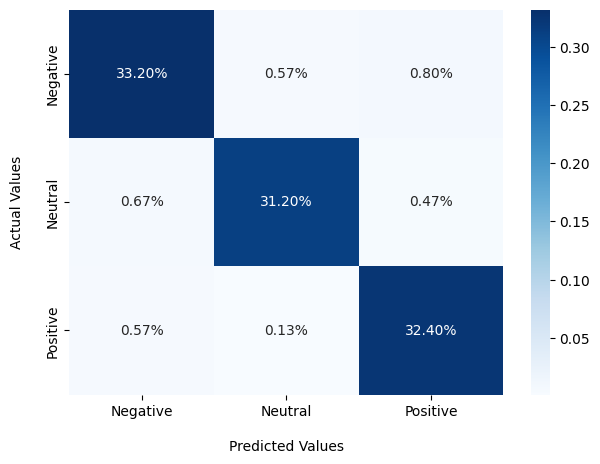

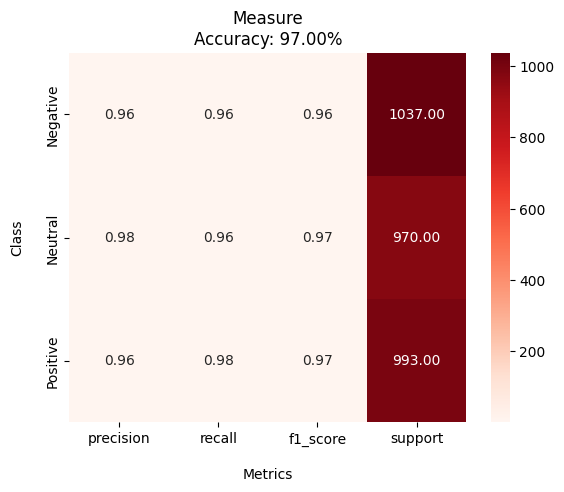

In [22]:
# For Data Visualization

import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random
from IPython import display

def prep_data(text):
    tokens = tokenizer(
        text, max_length=seq_len, truncation=True, 
        padding='max_length', 
        add_special_tokens=True, 
        return_tensors='tf'
    )
    return {
        'input_ids': tokens['input_ids'], 
        'attention_mask': tokens['attention_mask']
    }

test['prediction'] = None

for i, row in test.iterrows():
    tokens = prep_data(row['text'])
    #probs = bert_model.predict(tokens)
    probs = bert_model.predict_on_batch(tokens)
    pred = np.argmax(probs)
    test.at[i, 'prediction'] = pred
    
test['prediction'] = test['prediction'].astype(int)

labels = ['Negative','Neutral','Positive']
from sklearn.metrics import classification_report
print(classification_report(test['target'], test['prediction'], target_names=labels))

print()
print()
print()

from sklearn.metrics import *
cm = confusion_matrix(test['target'], test['prediction'])

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values\n');

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.savefig('cm.png')
plt.show()

print()
print()
print()

from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


def plot_classification_report(report):
    report_data = []
    lines = report.split('\n')
    lines = list(filter(None, lines))
    for line in lines[1:-3]:
        row = {}
        row_data = line.split()
        row_data = list(filter(None, row_data))
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    df = pd.DataFrame.from_dict(report_data)
    df.set_index('class', inplace=True)
    heatmap = sns.heatmap(df, annot=True, cmap='Reds', fmt='.2f')
    heatmap.set_xlabel('\nMetrics')
    heatmap.set_ylabel('Class\n')
    heatmap.set_title('Classification Report')


def accuracy_score(report):
    report_data = []
    lines = report.split('\n')
    lines = list(filter(None, lines))
    for line in lines[4:-2]:
        row_data = line.split()
        row_data = list(filter(None, row_data))
        return float(row_data[1])


labels = ['Negative','Neutral','Positive']

report = classification_report(test['target'], test['prediction'], target_names=labels)
plot_classification_report(report)
accuracy = accuracy_score(report)

plt.title('Measure\nAccuracy: {:.2f}%'.format(accuracy*100))
plt.savefig('classification_reports.png')
plt.show()


## BiLSTM

In [23]:
#'''
####### MODEL 3 #########
# detect and init the TPU
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
# instantiate a distribution strategy
#tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# instantiating the model in the strategy scope creates the model on the TPU
#with tpu_strategy.scope():
model_name = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
bert_model = TFAutoModel.from_pretrained(model_name)

# Input layers
input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')

# Transformer
embeddings = bert_model(input_ids, attention_mask=mask)[0]
embeddings = tf.keras.layers.GlobalAveragePooling1D()(embeddings)
embeddings = tf.keras.layers.Reshape((1, -1))(embeddings)

# Add a BiLSTM layer
lstm_units = 512 
lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units, return_sequences=True))(embeddings)

# Add Dense layers
#x = tf.keras.layers.Dense(512, activation='relu')(lstm)
x = tf.keras.layers.Dense(512, activation='relu')(lstm)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)

# Flatten the output tensor
x = tf.keras.layers.Flatten()(x)

# Classifier head
outputs = tf.keras.layers.Dense(3, activation='softmax', name='outputs')(x)

# Create the model
model = tf.keras.Model(inputs=[input_ids, mask], outputs=outputs)

# Compile the model
learning_rate = 4e-5 # 4e-5
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy()
model.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=tf.keras.metrics.CategoricalAccuracy())

filepath = "model.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
#lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_exp_decay)

# Fit the model with early stopping
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs= 50,
    batch_size=batch_size,
    callbacks=[early_stop]
    #callbacks=[lr_callback] 
)

#'''

All model checkpoint layers were used when initializing TFRobertaModel.

All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/50
525/525 [==============================] - 565s 997ms/step - loss: 0.5307 - categorical_accuracy: 0.8018 - val_loss: 0.2232 - val_categorical_accuracy: 0.9311
Epoch 2/50
525/525 [==============================] - 519s 989ms/step - loss: 0.2056 - categorical_accuracy: 0.9410 - val_loss: 0.1318 - val_categorical_accuracy: 0.9667
Epoch 3/50
525/525 [==============================] - 519s 989ms/step - loss: 0.1429 - categorical_accuracy: 0.9604 - val_loss: 0.0949 - val_categorical_accuracy: 0.9744
Epoch 4/50
525/525 [==============================] - 519s 989ms/step - loss: 0.0919 - categorical_accuracy: 0.9739 - val_loss: 0.0486 - val_categorical_accuracy: 0.9883
Epoch 5/50
525/525 [==============================] - 519s 988ms/step - loss: 0.0729 - categorical_accuracy: 0.9802 - val_loss: 0.0415 - val_categorical_accuracy: 0.9889
Epoch 6/50
525/525 [==============================] - 518s 987ms/step - loss: 0.0615 - categorical_accuracy: 0.9827 - val_loss: 0.0253 - val_categoric

              precision    recall  f1-score   support

    Negative       0.95      0.97      0.96      1037
     Neutral       0.98      0.96      0.97       970
    Positive       0.98      0.97      0.97       993

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000






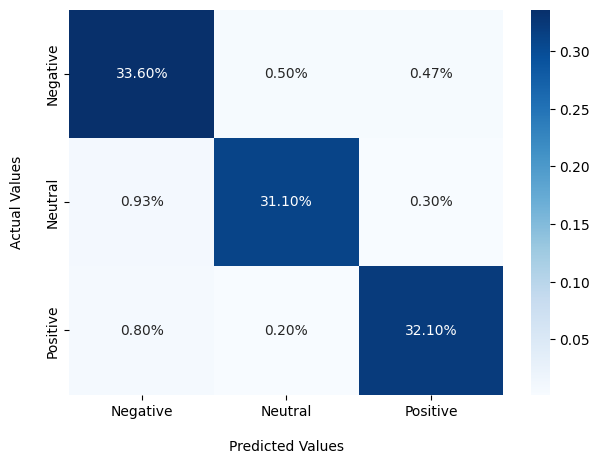

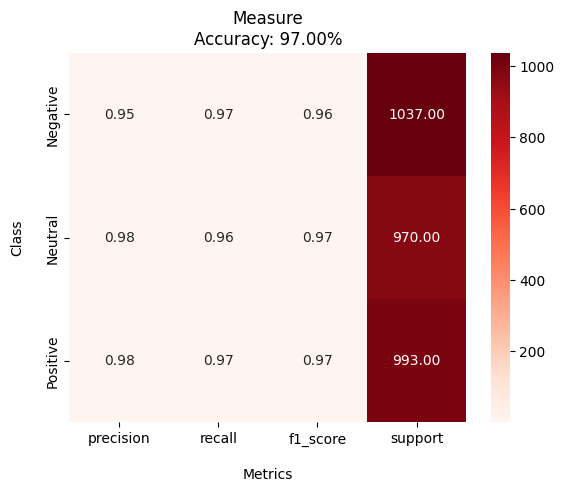

In [24]:
# For Data Visualization
bert_model = model

import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random
from IPython import display

def prep_data(text):
    tokens = tokenizer(
        text, max_length=seq_len, truncation=True, 
        padding='max_length', 
        add_special_tokens=True, 
        return_tensors='tf'
    )
    return {
        'input_ids': tokens['input_ids'], 
        'attention_mask': tokens['attention_mask']
    }

test['prediction'] = None

for i, row in test.iterrows():
    tokens = prep_data(row['text'])
    #probs = bert_model.predict(tokens)
    probs = bert_model.predict_on_batch(tokens)
    pred = np.argmax(probs)
    test.at[i, 'prediction'] = pred
    
test['prediction'] = test['prediction'].astype(int)

labels = ['Negative','Neutral','Positive']
from sklearn.metrics import classification_report
print(classification_report(test['target'], test['prediction'], target_names=labels))

print()
print()
print()

from sklearn.metrics import *
cm = confusion_matrix(test['target'], test['prediction'])

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values\n');

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.savefig('cm.png')
plt.show()

print()
print()
print()

from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


def plot_classification_report(report):
    report_data = []
    lines = report.split('\n')
    lines = list(filter(None, lines))
    for line in lines[1:-3]:
        row = {}
        row_data = line.split()
        row_data = list(filter(None, row_data))
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    df = pd.DataFrame.from_dict(report_data)
    df.set_index('class', inplace=True)
    heatmap = sns.heatmap(df, annot=True, cmap='Reds', fmt='.2f')
    heatmap.set_xlabel('\nMetrics')
    heatmap.set_ylabel('Class\n')
    heatmap.set_title('Classification Report')


def accuracy_score(report):
    report_data = []
    lines = report.split('\n')
    lines = list(filter(None, lines))
    for line in lines[4:-2]:
        row_data = line.split()
        row_data = list(filter(None, row_data))
        return float(row_data[1])


labels = ['Negative','Neutral','Positive']

report = classification_report(test['target'], test['prediction'], target_names=labels)
plot_classification_report(report)
accuracy = accuracy_score(report)

plt.title('Measure\nAccuracy: {:.2f}%'.format(accuracy*100))
plt.savefig('classification_reports.png')
plt.show()


## BiLSTM+Attention

In [25]:
'''
####### MODEL 4 #########
tf.keras.backend.clear_session()    
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# instantiating the model in the strategy scope creates the model on the TPU
with tpu_strategy.scope():
    model_name = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
    bert_model = TFAutoModel.from_pretrained(model_name)

    # Input layers
    input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32')
    mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')

    # Transformer
    embeddings = bert_model(input_ids, attention_mask=mask)[0]
    embeddings = tf.keras.layers.GlobalAveragePooling1D()(embeddings)
    embeddings = tf.keras.layers.Reshape((1, -1))(embeddings)

    # Add a BiLSTM layer
    lstm_units = 512 
    lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units, return_sequences=True))(embeddings)
    attention_layer = tf.keras.layers.Attention()([lstm, lstm])

    # Add Dense layers
    #x = tf.keras.layers.Dense(512, activation='relu')(lstm)
    x = tf.keras.layers.Dense(512, activation='relu')(attention_layer)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.05)(x)

    # Flatten the output tensor
    x = tf.keras.layers.Flatten()(x)

    # Classifier head
    outputs = tf.keras.layers.Dense(3, activation='softmax', name='outputs')(x)

    # Create the model
    model = tf.keras.Model(inputs=[input_ids, mask], outputs=outputs)

    # Compile the model
    learning_rate = 4e-5 # 4e-5
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss = tf.keras.losses.CategoricalCrossentropy()
    acc = tf.keras.metrics.CategoricalAccuracy()
    model.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=tf.keras.metrics.CategoricalAccuracy())


filepath = "model.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
#lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_exp_decay)

# Fit the model with early stopping
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs= 50,
    batch_size=batch_size,
    #callbacks=[early_stop, callbacks_list]
    callbacks=[early_stop]
    #callbacks=[lr_callback] 
)

'''

'\n####### MODEL 4 #########\ntf.keras.backend.clear_session()    \n# detect and init the TPU\ntpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()\n# instantiate a distribution strategy\ntpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)\n\n# instantiating the model in the strategy scope creates the model on the TPU\nwith tpu_strategy.scope():\n    model_name = \'cardiffnlp/twitter-roberta-base-sentiment-latest\'\n    bert_model = TFAutoModel.from_pretrained(model_name)\n\n    # Input layers\n    input_ids = tf.keras.layers.Input(shape=(seq_len,), name=\'input_ids\', dtype=\'int32\')\n    mask = tf.keras.layers.Input(shape=(seq_len,), name=\'attention_mask\', dtype=\'int32\')\n\n    # Transformer\n    embeddings = bert_model(input_ids, attention_mask=mask)[0]\n    embeddings = tf.keras.layers.GlobalAveragePooling1D()(embeddings)\n    embeddings = tf.keras.layers.Reshape((1, -1))(embeddings)\n\n    # Add a BiLSTM layer\n    lstm_units = 512 \n    lstm = tf.keras.la

In [26]:
'''
# For Data Visualization
bert_model = model

import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random
from IPython import display

def prep_data(text):
    tokens = tokenizer(
        text, max_length=seq_len, truncation=True, 
        padding='max_length', 
        add_special_tokens=True, 
        return_tensors='tf'
    )
    return {
        'input_ids': tokens['input_ids'], 
        'attention_mask': tokens['attention_mask']
    }

test['prediction'] = None

for i, row in test.iterrows():
    tokens = prep_data(row['text'])
    #probs = bert_model.predict(tokens)
    probs = bert_model.predict_on_batch(tokens)
    pred = np.argmax(probs)
    test.at[i, 'prediction'] = pred
    
test['prediction'] = test['prediction'].astype(int)

labels = ['Negative','Neutral','Positive']
from sklearn.metrics import classification_report
print(classification_report(test['target'], test['prediction'], target_names=labels))

print()
print()
print()

from sklearn.metrics import *
cm = confusion_matrix(test['target'], test['prediction'])

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values\n');

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.savefig('cm.png')
plt.show()

print()
print()
print()

from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


def plot_classification_report(report):
    report_data = []
    lines = report.split('\n')
    lines = list(filter(None, lines))
    for line in lines[1:-3]:
        row = {}
        row_data = line.split()
        row_data = list(filter(None, row_data))
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    df = pd.DataFrame.from_dict(report_data)
    df.set_index('class', inplace=True)
    heatmap = sns.heatmap(df, annot=True, cmap='Reds', fmt='.2f')
    heatmap.set_xlabel('\nMetrics')
    heatmap.set_ylabel('Class\n')
    heatmap.set_title('Classification Report')


def accuracy_score(report):
    report_data = []
    lines = report.split('\n')
    lines = list(filter(None, lines))
    for line in lines[4:-2]:
        row_data = line.split()
        row_data = list(filter(None, row_data))
        return float(row_data[1])


labels = ['Negative','Neutral','Positive']

report = classification_report(test['target'], test['prediction'], target_names=labels)
plot_classification_report(report)
accuracy = accuracy_score(report)

plt.title('Measure\nAccuracy: {:.2f}%'.format(accuracy*100))
plt.savefig('classification_reports.png')
plt.show()
'''

"\n# For Data Visualization\nbert_model = model\n\nimport matplotlib.pyplot as plt\nimport matplotlib\nimport plotly.express as px\nimport plotly.graph_objects as go\nimport seaborn as sns\n\n# Miscellaneous\nfrom tqdm import tqdm\nimport os\nimport random\nfrom IPython import display\n\ndef prep_data(text):\n    tokens = tokenizer(\n        text, max_length=seq_len, truncation=True, \n        padding='max_length', \n        add_special_tokens=True, \n        return_tensors='tf'\n    )\n    return {\n        'input_ids': tokens['input_ids'], \n        'attention_mask': tokens['attention_mask']\n    }\n\ntest['prediction'] = None\n\nfor i, row in test.iterrows():\n    tokens = prep_data(row['text'])\n    #probs = bert_model.predict(tokens)\n    probs = bert_model.predict_on_batch(tokens)\n    pred = np.argmax(probs)\n    test.at[i, 'prediction'] = pred\n    \ntest['prediction'] = test['prediction'].astype(int)\n\nlabels = ['Negative','Neutral','Positive']\nfrom sklearn.metrics import cl

## BiLSTM+CNN

In [27]:
# detect and init the TPU
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
# instantiate a distribution strategy
#tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# instantiating the model in the strategy scope creates the model on the TPU
#with tpu_strategy.scope():
model_name = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
bert_model = TFAutoModel.from_pretrained(model_name)

# Input layers
input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')

# Transformer
embeddings = bert_model(input_ids, attention_mask=mask)[0]
embeddings = tf.keras.layers.GlobalAveragePooling1D()(embeddings)
embeddings = tf.keras.layers.Reshape((1, -1))(embeddings)

# Add BiLSTM layer 1
lstm_units_1 = 512
bilstm_1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=lstm_units_1, return_sequences=True))(embeddings)
bilstm_1 = tf.keras.layers.Dropout(rate=0.2)(bilstm_1)

# Add convolution layers
num_filters = 64
filter_sizes = [5, 5, 3]
conv_activation = 'relu'
dropout_rate = 0.2

conv1 = tf.keras.layers.Conv1D(filters=num_filters, kernel_size=filter_sizes[0], activation=conv_activation, padding='same')(bilstm_1)
conv1 = tf.keras.layers.Dropout(rate=dropout_rate)(conv1)

conv2 = tf.keras.layers.Conv1D(filters=num_filters*2, kernel_size=filter_sizes[1], activation=conv_activation, padding='same')(conv1)
conv2 = tf.keras.layers.Dropout(rate=dropout_rate)(conv2)

conv3 = tf.keras.layers.Conv1D(filters=num_filters*4, kernel_size=filter_sizes[2], activation=conv_activation, padding='same')(conv2)
conv3 = tf.keras.layers.MaxPooling1D(pool_size=3, strides=1, padding='same')(conv3)
conv3 = tf.keras.layers.Dropout(rate=dropout_rate)(conv3)

# Add dense layers
hidden_units = [128, 64]
dense_activation = 'relu'

flatten = tf.keras.layers.Flatten()(conv3)
dense1 = tf.keras.layers.Dense(units=hidden_units[0], activation=dense_activation)(flatten)
dense1 = tf.keras.layers.Dropout(rate=dropout_rate)(dense1)

dense2 = tf.keras.layers.Dense(units=hidden_units[1], activation=dense_activation)(dense1)
dense2 = tf.keras.layers.Dropout(rate=dropout_rate)(dense2)

# Add Output layer
outputs = tf.keras.layers.Dense(3, activation='softmax', name='outputs')(dense2)

# Define model
model = tf.keras.models.Model(inputs=[input_ids, mask], outputs=outputs)

# Compile the model
learning_rate = 4e-5 # 4e-5
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy()
model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
#lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_exp_decay)

# Fit the model with early stopping
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs= 50,
    batch_size=batch_size,
    callbacks=[early_stop]
    #callbacks=[lr_callback] #
)


All model checkpoint layers were used when initializing TFRobertaModel.

All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/50
525/525 [==============================] - 566s 996ms/step - loss: 1.0989 - categorical_accuracy: 0.3286 - val_loss: 1.0986 - val_categorical_accuracy: 0.3350
Epoch 2/50
525/525 [==============================] - 517s 985ms/step - loss: 1.0987 - categorical_accuracy: 0.3351 - val_loss: 1.0987 - val_categorical_accuracy: 0.3353
Epoch 3/50
525/525 [==============================] - 517s 984ms/step - loss: 1.0987 - categorical_accuracy: 0.3407 - val_loss: 1.0987 - val_categorical_accuracy: 0.3358
Epoch 4/50
525/525 [==============================] - 518s 986ms/step - loss: 1.0988 - categorical_accuracy: 0.3318 - val_loss: 1.0986 - val_categorical_accuracy: 0.3394
Epoch 5/50
525/525 [==============================] - 518s 985ms/step - loss: 1.0984 - categorical_accuracy: 0.3429 - val_loss: 1.0987 - val_categorical_accuracy: 0.3317
Epoch 6/50
525/525 [==============================] - 519s 987ms/step - loss: 1.0986 - categorical_accuracy: 0.3374 - val_loss: 1.0985 - val_categoric

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1037
     Neutral       0.00      0.00      0.00       970
    Positive       0.33      1.00      0.50       993

    accuracy                           0.33      3000
   macro avg       0.11      0.33      0.17      3000
weighted avg       0.11      0.33      0.16      3000






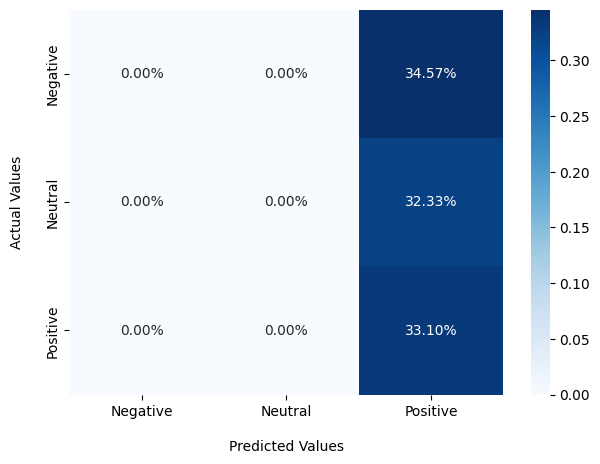

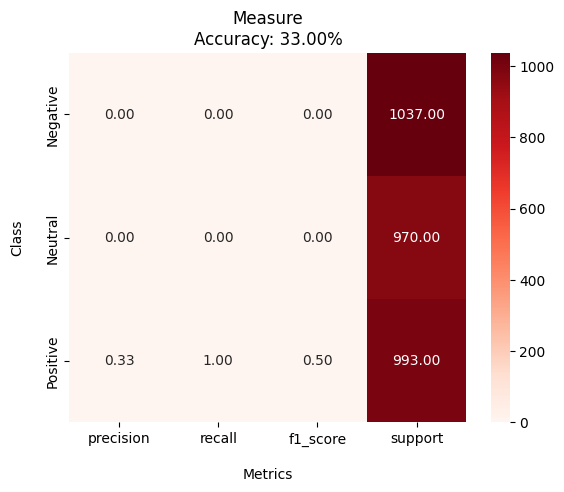

In [28]:
# For Data Visualization
bert_model = model

import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random
from IPython import display

def prep_data(text):
    tokens = tokenizer(
        text, max_length=seq_len, truncation=True, 
        padding='max_length', 
        add_special_tokens=True, 
        return_tensors='tf'
    )
    return {
        'input_ids': tokens['input_ids'], 
        'attention_mask': tokens['attention_mask']
    }

test['prediction'] = None

for i, row in test.iterrows():
    tokens = prep_data(row['text'])
    #probs = bert_model.predict(tokens)
    probs = bert_model.predict_on_batch(tokens)
    pred = np.argmax(probs)
    test.at[i, 'prediction'] = pred
    
test['prediction'] = test['prediction'].astype(int)

labels = ['Negative','Neutral','Positive']
from sklearn.metrics import classification_report
print(classification_report(test['target'], test['prediction'], target_names=labels))

print()
print()
print()

from sklearn.metrics import *
cm = confusion_matrix(test['target'], test['prediction'])

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values\n');

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.savefig('cm.png')
plt.show()

print()
print()
print()

from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


def plot_classification_report(report):
    report_data = []
    lines = report.split('\n')
    lines = list(filter(None, lines))
    for line in lines[1:-3]:
        row = {}
        row_data = line.split()
        row_data = list(filter(None, row_data))
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    df = pd.DataFrame.from_dict(report_data)
    df.set_index('class', inplace=True)
    heatmap = sns.heatmap(df, annot=True, cmap='Reds', fmt='.2f')
    heatmap.set_xlabel('\nMetrics')
    heatmap.set_ylabel('Class\n')
    heatmap.set_title('Classification Report')


def accuracy_score(report):
    report_data = []
    lines = report.split('\n')
    lines = list(filter(None, lines))
    for line in lines[4:-2]:
        row_data = line.split()
        row_data = list(filter(None, row_data))
        return float(row_data[1])


labels = ['Negative','Neutral','Positive']

report = classification_report(test['target'], test['prediction'], target_names=labels)
plot_classification_report(report)
accuracy = accuracy_score(report)

plt.title('Measure\nAccuracy: {:.2f}%'.format(accuracy*100))
plt.savefig('classification_reports.png')
plt.show()

In [29]:
'''
model.load_weights('/kaggle/working/model.h5')
model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs= 5,
    batch_size=batch_size,
    callbacks=[early_stop, callbacks_list]
    #callbacks=[lr_callback] #
)
'''

"\nmodel.load_weights('/kaggle/working/model.h5')\nmodel.compile(optimizer=optimizer, loss=loss, metrics=[acc])\n\nhistory = model.fit(\n    train_ds,\n    validation_data=val_ds,\n    epochs= 5,\n    batch_size=batch_size,\n    callbacks=[early_stop, callbacks_list]\n    #callbacks=[lr_callback] #\n)\n"

In [30]:
#!zip -r file.zip /content/model.h5